# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

# Import data

In [2]:
train = pd.read_csv('./datasets/train.csv')

**The square root of the number of data points is ~45. I will attempt to have less than 45 features, as per the "Riley Rule".**

In [3]:
np.sqrt(2051)

45.28796749689701

# Data Familiarization and Cleaning

In [4]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
train.shape

(2051, 81)

In [9]:
#change column names to lowercase, replace spaces with underscore
train.columns = [column.lower().replace(' ', '_') for column in train.columns]

In [10]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [11]:
numeric_cols = train._get_numeric_data().columns

In [12]:
numeric_cols

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'garage_yr_blt', 'garage_cars', 'garage_area', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'misc_val', 'mo_sold', 'yr_sold', 'saleprice'],
      dtype='object')

In [13]:
train[numeric_cols].head()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [14]:
#columns that have 'string data'
nominal_cols = [i for i in train.columns if i not in numeric_cols]

In [15]:
#these are features we may want to dummy, convert to ordinal, or drop
nominal_cols

['ms_zoning',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 'kitchen_qual',
 'functional',
 'fireplace_qu',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'pool_qc',
 'fence',
 'misc_feature',
 'sale_type']

In [16]:
train[nominal_cols].head()

,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,...,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD


### Looking for missing data!

In [17]:
#all our columns, data types, missing data, non-null values per columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         20

In [18]:
#creating a dictionary of the above information with only the columns that have null values
null_cols_dict = {col:train[col].isnull().sum() for col in train.columns if train[col].isnull().sum() > 0}

In [19]:
null_cols_dict

{'lot_frontage': 330,
 'alley': 1911,
 'mas_vnr_type': 22,
 'mas_vnr_area': 22,
 'bsmt_qual': 55,
 'bsmt_cond': 55,
 'bsmt_exposure': 58,
 'bsmtfin_type_1': 55,
 'bsmtfin_sf_1': 1,
 'bsmtfin_type_2': 56,
 'bsmtfin_sf_2': 1,
 'bsmt_unf_sf': 1,
 'total_bsmt_sf': 1,
 'bsmt_full_bath': 2,
 'bsmt_half_bath': 2,
 'fireplace_qu': 1000,
 'garage_type': 113,
 'garage_yr_blt': 114,
 'garage_finish': 114,
 'garage_cars': 1,
 'garage_area': 1,
 'garage_qual': 114,
 'garage_cond': 114,
 'pool_qc': 2042,
 'fence': 1651,
 'misc_feature': 1986}

In [20]:
#creating a list of just the column names from the dictionary
null_cols = list(null_cols_dict.keys())

In [21]:
#that's a lot of nulls
train.isnull().sum().sum()

9822

In [22]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Checking correlations for null column correlations, before filling with zeros or NAs...

In [23]:
null_cols.append('saleprice')   # added 'saleprice', our target variable, to check correlations

In [24]:
null_col_corr = train[null_cols].corr()

In [25]:
#this tells me that we cannot be reckless with these variables as they correlate significantly with saleprice.
null_col_corr['saleprice'].sort_values(ascending = False)

saleprice         1.000000
garage_area       0.650270
garage_cars       0.648220
total_bsmt_sf     0.628925
garage_yr_blt     0.533922
mas_vnr_area      0.512230
bsmtfin_sf_1      0.423519
lot_frontage      0.341842
bsmt_full_bath    0.283662
bsmt_unf_sf       0.190210
bsmtfin_sf_2      0.016255
bsmt_half_bath   -0.045328
Name: saleprice, dtype: float64

In [26]:
strong_null_cols = ['lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', 'bsmt_full_bath', 
                    'garage_yr_blt', 'garage_cars', 'garage_area']

In [27]:
train[strong_null_cols].isnull().sum()

lot_frontage      330
mas_vnr_area       22
bsmtfin_sf_1        1
total_bsmt_sf       1
bsmt_full_bath      2
garage_yr_blt     114
garage_cars         1
garage_area         1
dtype: int64

## Working with null values:

**For most of the columns with nulls, the correlation of the variable with sale price is not strong, so we probably won't include them in our model.**

**Some of the these variables we will want to use. Since we know many of the Nans are actually 'NA', meaning, absence of a character, we can fill them as such. For the numerical variables, we can leave them at 0 to correspond with that absence, or we can fill them with 0.**

**Most of these features have a small number of missing values, so it is okay to fill them with a standard default.**

In [28]:
#This function iterates through each column in the dataframe, filling np.nan values with 
#either the string 'NA' if the column dtype is 'object', or with 0 if the column dtype is float or int.
def fill_nan(dataframe):
    for col in dataframe:
        if dataframe[col].dtypes == object:
            dataframe[col].replace(np.nan, 'NA', regex=True, inplace=True)
        elif (dataframe[col].dtypes == int) | (dataframe[col].dtypes == float):
            dataframe[col].replace(np.nan, 0, regex=True, inplace=True)

In [29]:
#calling the above function on the train dataframe
fill_nan(train)

In [30]:
#shows replacement of nulls to string 'NA', string 'none', 0
train[null_cols].head()

,lot_frontage,alley,mas_vnr_type,mas_vnr_area,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,...,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,pool_qc,fence,misc_feature,saleprice
0,0.0,NA,BrkFace,289.0,TA,TA,No,GLQ,533.0,Unf,...,1976.0,RFn,2.0,475.0,TA,TA,NA,NA,NA,130500
1,43.0,NA,BrkFace,132.0,Gd,TA,No,GLQ,637.0,Unf,...,1997.0,RFn,2.0,559.0,TA,TA,NA,NA,NA,220000
2,68.0,NA,None,0.0,TA,TA,No,GLQ,731.0,Unf,...,1953.0,Unf,1.0,246.0,TA,TA,NA,NA,NA,109000
3,73.0,NA,None,0.0,Gd,TA,No,Unf,0.0,Unf,...,2007.0,Fin,2.0,400.0,TA,TA,NA,NA,NA,174000
4,82.0,NA,None,0.0,Fa,Gd,No,Unf,0.0,Unf,...,1957.0,Unf,2.0,484.0,TA,TA,NA,NA,NA,138500


In [31]:
#list comprehension to create another list of the columns that originally are without nulls 
#this runs all the column names against the null_cols list from above and then creates a new list.
#I did this so I could then systematically go through the data in each column to create a plan of attack
#seen below, this plan lays out more EDA, ie dropping columns, creating dummy variables, and creating new features.
not_nulls = [col for col in train.columns if col not in null_cols]

In [32]:
not_nulls

['id',
 'pid',
 'ms_subclass',
 'ms_zoning',
 'lot_area',
 'street',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'exter_qual',
 'exter_cond',
 'foundation',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'paved_drive',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 '3ssn_porch',
 'screen_porch',
 'pool_area',
 'misc_val',
 'mo_sold',
 'yr_sold',
 'sale_type']

## Transforming nominal ranking values to ordinal:

In [33]:
#this will turn columns with the red nominal values to the green ordinal values so I can incorporate these features
#in my feature engineering.
ordinal_dict = {'Ex': 5,
                'Gd': 4,
                'TA': 3,
                'Fa': 2,
                'Po': 1,
                'NA': 0}

In [34]:
train.replace(ordinal_dict.keys(), ordinal_dict.values(), inplace=True)


# EXPLORATORY DATA ANALYSIS (with revised plan)

**What preceded this plan was looking intently through the columns and checking out the values that existed for many of the variables, as per the [data documentation guide](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).**

### Feature Engineering

- year_built = year_sold - year_built = house_age
- year_remod/add = year_sold - year_remod/add = remod_age
- low_qual_fin_sf to either has or does not have low quality finish (most do not, but this is important for low price   prediciton
- exterior_qual * exterior_cond (first, dummy! or add strings and then dummy unique additions)
- total bathrooms = half_bath + bath
- central air: replace Y to 1 and N to 0
- garage - change finish to ordinal = multiply by other garage features
- new

**Log Features**
 - sale price
 - lot area
 - total area

**Feature Interactions**
 - overall_qual * overall_cond
 - remod_age * house_age
 - kitchen_qual (turn to ordinal value) * kitchen_?
 - totrms_abvgrd * bedroom
 - pool_area * pool_qc (turn to ordinal)
 - misc_value
 - functional (or turn to nominal and use as interaction term


In [35]:
#creating a correlation df for 'saleprice'
correlations = train.corr()['saleprice']

In [36]:
correlations

id                -0.051398
pid               -0.255052
ms_subclass       -0.087335
lot_frontage       0.181456
lot_area           0.296566
overall_qual       0.800207
overall_cond      -0.097019
year_built         0.571849
year_remod/add     0.550370
mas_vnr_area       0.503579
exter_qual         0.712146
exter_cond         0.036418
bsmt_qual          0.612188
bsmt_cond          0.225075
bsmtfin_sf_1       0.423856
bsmtfin_sf_2       0.016432
bsmt_unf_sf        0.190861
total_bsmt_sf      0.629303
heating_qc         0.458354
1st_flr_sf         0.618486
2nd_flr_sf         0.248452
low_qual_fin_sf   -0.041594
gr_liv_area        0.697038
bsmt_full_bath     0.283332
bsmt_half_bath    -0.045290
full_bath          0.537969
half_bath          0.283001
bedroom_abvgr      0.137067
kitchen_abvgr     -0.125444
kitchen_qual       0.692336
totrms_abvgrd      0.504014
fireplaces         0.471093
fireplace_qu       0.538925
garage_yr_blt      0.258645
garage_cars        0.647781
garage_area        0

In [37]:
#mask shows only correlations greater than or equal to abs(0.2)
mask = (correlations >= 0.2) | (correlations <= -0.2)

In [38]:
#creating a list of the columns return from the above mask
strong_corrs = list(correlations[mask].keys())

In [39]:
#removing 'pid' from the list
strong_corrs = strong_corrs[1:]

In [40]:
strong_corrs

['lot_area',
 'overall_qual',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'exter_qual',
 'bsmt_qual',
 'bsmt_cond',
 'bsmtfin_sf_1',
 'total_bsmt_sf',
 'heating_qc',
 '1st_flr_sf',
 '2nd_flr_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'full_bath',
 'half_bath',
 'kitchen_qual',
 'totrms_abvgrd',
 'fireplaces',
 'fireplace_qu',
 'garage_yr_blt',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'wood_deck_sf',
 'open_porch_sf',
 'saleprice']

## Log Transformations:

#### Plotting the distribution of Sale Prices

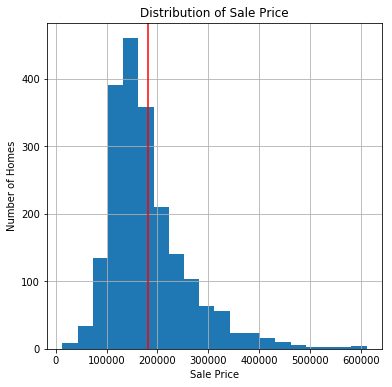

In [41]:
#shows that there is naturally some skew in our data, with 
train['saleprice'].hist(figsize=(6,6), bins=20)
plt.xlabel("Sale Price")
plt.ylabel("Number of Homes")
plt.title('Distribution of Sale Price')
plt.axvline(np.mean(train['saleprice']), c='r');

In [42]:
log_price = np.log(train['saleprice'])

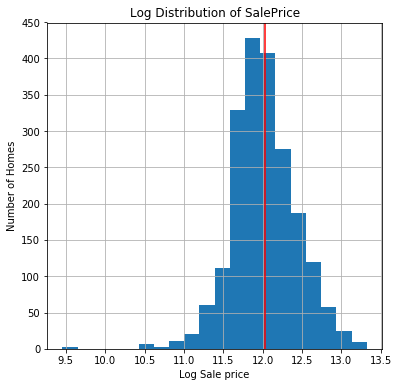

In [43]:
np.log(train['saleprice']).hist(figsize=(6,6), bins=20)
plt.xlabel("Log Sale price")
plt.ylabel("Number of Homes")
plt.title('Log Distribution of SalePrice')
plt.axvline(np.mean(log_price), c='r');

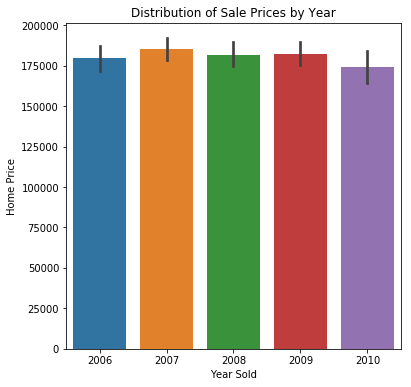

In [45]:
#Minor changes to the median for sale price across the years included in the data.
plt.figure(figsize=(6,6))
plt.title('Distribution of Sale Prices by Year')
ax = sns.barplot(train['yr_sold'], train['saleprice'])
ax.set_ylabel('Home Price')
ax.set_xlabel('Year Sold');

**Create a new column for log of Sale Price**

In [46]:
train['log_saleprice'] = np.log(train['saleprice'])

## Create a function for all the new features


In [47]:
def final_feature_generator(dataframe):
    dataframe['house_age'] = dataframe['yr_sold'] - dataframe['year_built']
    dataframe['remod_age'] = dataframe['yr_sold'] - dataframe['year_remod/add']
    dataframe['cond_qual'] = dataframe['overall_cond'] * dataframe['overall_qual']
    dataframe['kitchen'] = dataframe['kitchen_qual'] * dataframe['kitchen_abvgr']
    dataframe['room_score'] = dataframe['totrms_abvgrd'] * dataframe['bedroom_abvgr']
    dataframe['pool_score'] = dataframe['pool_area'] * dataframe['pool_qc']
    dataframe['tot_bath'] = dataframe['bsmt_full_bath'] + dataframe['bsmt_half_bath'] + dataframe['full_bath'] + dataframe['half_bath']
    dataframe['fireplace'] = dataframe['fireplaces'] * dataframe['fireplace_qu']
    dataframe['tot_garage'] = dataframe['garage_area'] * dataframe['garage_qual'] * dataframe['garage_cars']
    dataframe['has_pool'] = dataframe['pool_qc'].replace([0, 1, 2, 3, 4, 5], [0, 1, 1, 1, 1, 1])
    dataframe['central_air'] = dataframe['central_air'].replace(['Y','N'], [1,0])
    dataframe['log_lot_area'] = np.log(dataframe['lot_area'])
    dataframe['log_total_area'] = np.log(dataframe['total_bsmt_sf'] + dataframe['1st_flr_sf'] + 
                                         dataframe['2nd_flr_sf'] + dataframe['gr_liv_area'] + 
                                         dataframe['garage_area'])
    return dataframe

In [48]:
train = final_feature_generator(train)

In [49]:
#turning the outputs for tot_bath to ints so these features will match up with the test dataframe.
train['tot_bath'] = train['tot_bath'].astype(int)

**Similarly to the distribution of sale price, many of the features of the dataset can be log transformed as to more linearly predict sale price. We can see these transformations with the continuous features, like lot area and total area, below.**

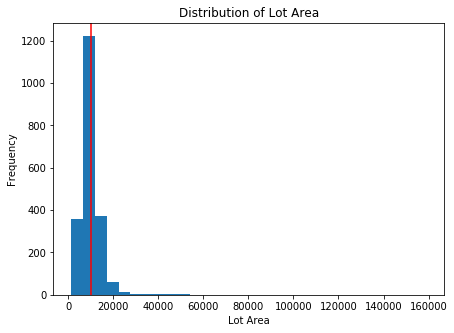

In [50]:
plt.figure(figsize=(7,5))
plt.title('Distribution of Lot Area')
plt.xlabel('Lot Area')
train['lot_area'].plot(kind='hist', bins = 30)
plt.axvline(np.mean(train['lot_area']), c='r');

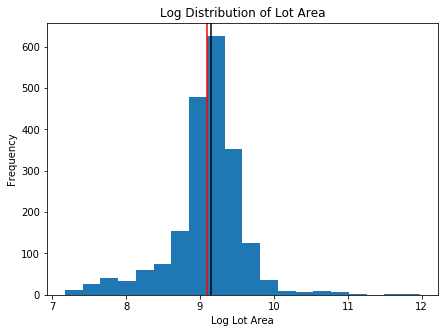

In [51]:
plt.figure(figsize=(7,5))
plt.title('Log Distribution of Lot Area')
plt.xlabel('Log Lot Area')

np.log(train['lot_area']).plot(kind='hist', bins=20)
plt.axvline(np.mean(train['log_lot_area']), c='r')
plt.axvline(np.median(train['log_lot_area']), c='black');

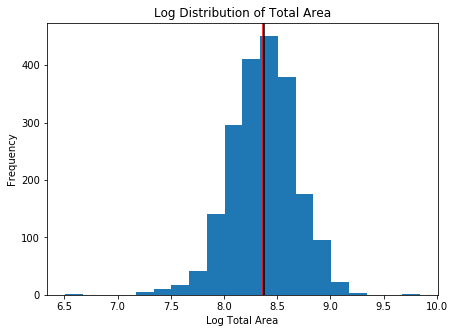

In [52]:
plt.figure(figsize=(7,5))
plt.title('Log Distribution of Total Area')
plt.xlabel('Log Total Area')

train['log_total_area'].plot(kind='hist', bins=20)
plt.axvline(np.mean(train['log_total_area']), c='r')
plt.axvline(np.median(train['log_total_area']), c='black');

**Check correlation and compare to original variables**



In [53]:
train[['log_saleprice', 'lot_area']].corr()

,log_saleprice,lot_area
log_saleprice,1.000000,0.279942
lot_area,0.279942,1.000000


In [54]:
#alas, we see an improvement!
train[['log_saleprice', 'log_lot_area', 'log_total_area']].corr()

,log_saleprice,log_lot_area,log_total_area
log_saleprice,1.000000,0.360862,0.825033
log_lot_area,0.360862,1.000000,0.408580
log_total_area,0.825033,0.408580,1.000000


## VISUALIZING NOMINAL DATA

**By looking at the boxplot distributions, we can make a note of the featuers where there is considerable visual variation in sale price for each subcategory. This helped me consider which features to 1 hot encode.**

**Features to consider:**
- ms_zoning
- street
- land_contour
- neighborhood
- condition_1
- condition_2
- bldg_type
- house_style
- roof_style
- roof_material
- exterior_1st
- exterior_2nd
- foundation
- bsmt_exposure
- heating
- central_air
- garage_finish
- paved_drive

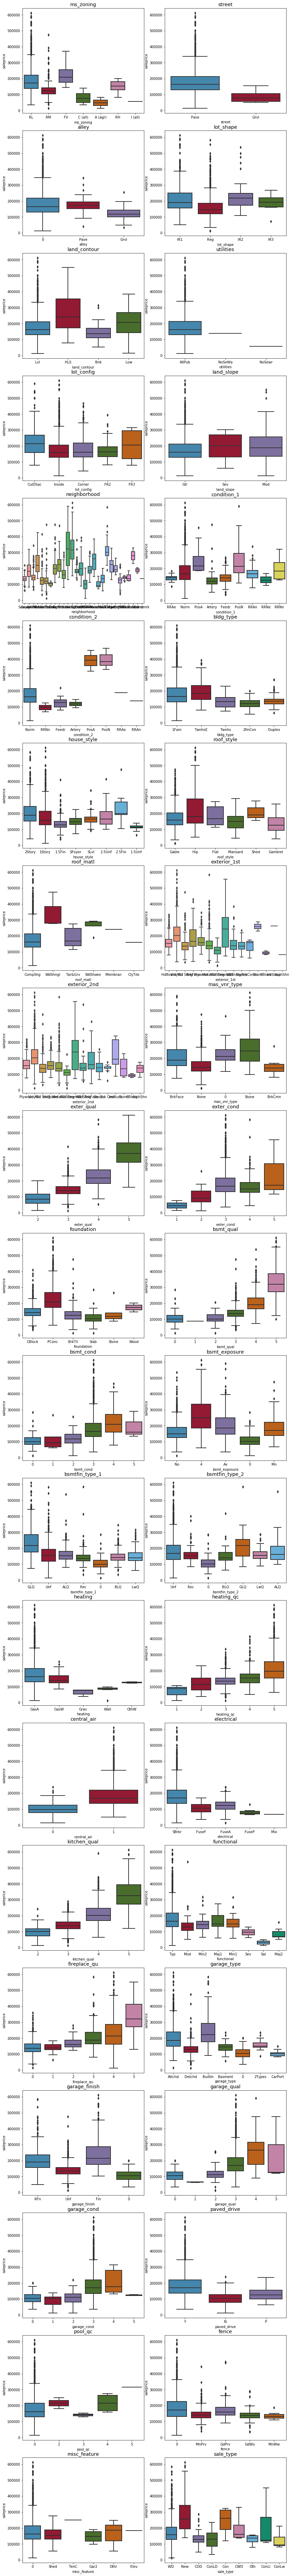

In [55]:
nrows=int(np.ceil((len(nominal_cols))/2))
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize= (12, 2.5 * len(nominal_cols)))
plt.style.use('bmh')
plt.tight_layout(pad=3)
ax = ax.ravel() 
for i, column in enumerate(nominal_cols):
    sns.boxplot(x = train[column], y = train['saleprice'], ax=ax[i]) 
    ax[i].set_title(nominal_cols[i])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


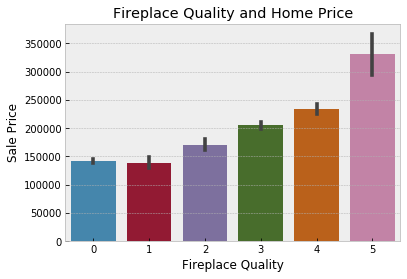

In [158]:
plt.title('Fireplace Quality and Home Price')

ax = sns.barplot(train['fireplace_qu'], train['saleprice'])
ax.set_xlabel('Fireplace Quality')
ax.set_ylabel('Sale Price');

#### Creating a binary column for "New House"

In [56]:
#first creating a new column
train['new_house'] = 0

#then I fill it with a 
for i in train.index:
    if train['year_built'][i] == train['yr_sold'][i]:
        train.loc[[i], ['new_house']] = 1

In [57]:
train['new_house'].value_counts()

0    1971
1      80
Name: new_house, dtype: int64

## ONE HOT ENCODING (Dummy Variables)
 
**I created this list from looking at the categorical and ordinal variables as seen in the boxplots near the beginning of the notebook.**
- tot_bath
- ms_zoning
- land_contour
- neighborhood
- paved_drive
- roof_style
- exterior_2nd
- foundation
- sale_type


In [58]:
dummy_cols = ['tot_bath', 'ms_zoning', 'land_contour', 'neighborhood', 'roof_style', 'exterior_2nd',
              'foundation', 'paved_drive', 'sale_type']

In [59]:
#this function takes a list of columns to 1 hot encode.
#set to False because we will I use some of the highly correlative dummies in my model.
def dummy_generator(dataframe, column_list):
    dataframe = pd.get_dummies(dataframe, columns=column_list, drop_first=False) 
    return dataframe
                                                                                

In [60]:
train = dummy_generator(train, dummy_cols)

In [61]:
train.head()

,id,pid,ms_subclass,lot_frontage,lot_area,street,alley,lot_shape,utilities,lot_config,...,paved_drive_Y,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,533352170,60,0.0,13517,Pave,0,IR1,AllPub,CulDSac,...,1,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,Pave,0,IR1,AllPub,CulDSac,...,1,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,Pave,0,Reg,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,Pave,0,Reg,AllPub,Inside,...,1,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,Pave,0,IR1,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,1


In [62]:
train[['saleprice', 'paved_drive_N', 
       'paved_drive_P', 'paved_drive_Y']].corr()['saleprice'].sort_values(ascending=False)

saleprice        1.000000
paved_drive_Y    0.289210
paved_drive_P   -0.090742
paved_drive_N   -0.273613
Name: saleprice, dtype: float64

In [63]:
train[['saleprice', 'foundation_BrkTil', 'foundation_CBlock', 'foundation_PConc', 'foundation_Slab', 'foundation_Stone',
       'foundation_Wood']].corr()['saleprice'].sort_values(ascending=False)
#'foundation_PConc', 'foundation_CBlock', 'foundation_BrkTil'

saleprice            1.000000
foundation_PConc     0.529047
foundation_Wood     -0.003044
foundation_Stone    -0.023853
foundation_Slab     -0.119052
foundation_BrkTil   -0.229891
foundation_CBlock   -0.355535
Name: saleprice, dtype: float64

In [64]:
train[['saleprice', 'exterior_2nd_AsbShng', 'exterior_2nd_AsphShn', 'exterior_2nd_Brk Cmn', 'exterior_2nd_BrkFace', 'exterior_2nd_CBlock',
       'exterior_2nd_CmentBd', 'exterior_2nd_HdBoard', 'exterior_2nd_ImStucc', 'exterior_2nd_MetalSd',
       'exterior_2nd_Plywood', 'exterior_2nd_Stone', 'exterior_2nd_Stucco', 'exterior_2nd_VinylSd',
       'exterior_2nd_Wd Sdng']].corr()['saleprice'].sort_values(ascending=False)

#'exterior_2nd_VinylSd', 'exterior_2nd_CmentBd', 'exterior_2nd_Wd Sdng'

saleprice               1.000000
exterior_2nd_VinylSd    0.337563
exterior_2nd_CmentBd    0.156999
exterior_2nd_ImStucc    0.042631
exterior_2nd_BrkFace    0.010688
exterior_2nd_AsphShn   -0.023834
exterior_2nd_Stone     -0.024642
exterior_2nd_CBlock    -0.035276
exterior_2nd_Brk Cmn   -0.047893
exterior_2nd_Stucco    -0.051885
exterior_2nd_Plywood   -0.059541
exterior_2nd_HdBoard   -0.102462
exterior_2nd_AsbShng   -0.110404
exterior_2nd_MetalSd   -0.139339
exterior_2nd_Wd Sdng   -0.172971
Name: saleprice, dtype: float64

In [65]:
train[['saleprice', 'roof_style_Flat', 'roof_style_Gable', 'roof_style_Gambrel', 'roof_style_Hip', 'roof_style_Mansard',
       'roof_style_Shed']].corr()['saleprice'].sort_values(ascending=False)

#'roof_style_Hip', 'roof_style_Gable'

saleprice             1.000000
roof_style_Hip        0.265224
roof_style_Shed       0.013136
roof_style_Flat       0.010224
roof_style_Mansard   -0.021289
roof_style_Gambrel   -0.041883
roof_style_Gable     -0.249329
Name: saleprice, dtype: float64

In [66]:
train[['saleprice', 'paved_drive_N', 'paved_drive_P', 'paved_drive_Y']].corr()['saleprice'].sort_values(ascending=True)

#'paved_drive_Y', 'paved_drive_N'

paved_drive_N   -0.273613
paved_drive_P   -0.090742
paved_drive_Y    0.289210
saleprice        1.000000
Name: saleprice, dtype: float64

In [67]:
train[['saleprice', 'neighborhood_Blmngtn','neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
       'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert' , 
       'neighborhood_Greens', 'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_Landmrk', 
       'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill', 
       'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 
       'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
       'neighborhood_StoneBr', 'neighborhood_Timber', 
       'neighborhood_Veenker']].corr()['saleprice'].sort_values(ascending=False)

#non-negligible correlation: 
#'neighborhood_NridgHt', 'neighborhood_NoRidge', 'neighborhood_StoneBr', 'neighborhood_Somerst', 'neighborhood_Edwards'   
#'neighborhood_IDOTRR', 'neighborhood_NAmes', neighborhood_OldTown'

saleprice               1.000000
neighborhood_NridgHt    0.448647
neighborhood_NoRidge    0.263395
neighborhood_StoneBr    0.256977
neighborhood_Somerst    0.150078
neighborhood_Timber     0.116400
neighborhood_Veenker    0.083186
neighborhood_CollgCr    0.082309
neighborhood_Crawfor    0.058386
neighborhood_ClearCr    0.052503
neighborhood_GrnHill    0.038848
neighborhood_NWAmes     0.034926
neighborhood_Blmngtn    0.024900
neighborhood_Gilbert    0.023974
neighborhood_SawyerW    0.016708
neighborhood_Greens     0.003476
neighborhood_Landmrk   -0.012395
neighborhood_Blueste   -0.025226
neighborhood_Mitchel   -0.035574
neighborhood_NPkVill   -0.047296
neighborhood_SWISU     -0.074214
neighborhood_BrDale    -0.095305
neighborhood_MeadowV   -0.111558
neighborhood_Sawyer    -0.133692
neighborhood_BrkSide   -0.134790
neighborhood_Edwards   -0.176119
neighborhood_IDOTRR    -0.189237
neighborhood_NAmes     -0.189387
neighborhood_OldTown   -0.208371
Name: saleprice, dtype: float64

In [68]:
#not a strong correlation - will not include these features
train[['saleprice', 'land_contour_Bnk', 'land_contour_HLS', 'land_contour_Low', 
       'land_contour_Lvl']].corr()['saleprice'].sort_values(ascending=False)

#non-negligible correlation: 'land_contour_HLS'

saleprice           1.000000
land_contour_HLS    0.212245
land_contour_Low    0.032953
land_contour_Lvl   -0.092830
land_contour_Bnk   -0.098143
Name: saleprice, dtype: float64

In [69]:
#not a very good correlation - so I will remove these dummies
train[['saleprice', 'ms_zoning_A (agr)','ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_I (all)',
       'ms_zoning_RH', 'ms_zoning_RL', 'ms_zoning_RM']].corr()['saleprice'].sort_values(ascending=False)

#'ms_zoning_RL', 'ms_zoning_RM'

saleprice            1.000000
ms_zoning_RL         0.231468
ms_zoning_FV         0.106695
ms_zoning_RH        -0.034118
ms_zoning_I (all)   -0.034519
ms_zoning_A (agr)   -0.052900
ms_zoning_C (all)   -0.126253
ms_zoning_RM        -0.281951
Name: saleprice, dtype: float64

In [70]:
#there is a decent correlation here, so I will try to include these dummies
train[['tot_bath_1',
       'tot_bath_2',
       'tot_bath_3',
       'tot_bath_4',
       'tot_bath_5',
       'tot_bath_6',
       'tot_bath_8',
       'saleprice']].corr()['saleprice'].sort_values(ascending=False)

#'tot_bath_4', 'tot_bath3', 'tot_bath_2', 'tot_bath_1'

saleprice     1.000000
tot_bath_4    0.406025
tot_bath_3    0.282564
tot_bath_5    0.148405
tot_bath_8    0.034708
tot_bath_6   -0.003065
tot_bath_2   -0.286929
tot_bath_1   -0.377382
Name: saleprice, dtype: float64

In [71]:
train[['saleprice', 'sale_type_COD', 'sale_type_CWD', 'sale_type_Con', 'sale_type_ConLD',
       'sale_type_ConLI', 'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth',
       'sale_type_WD ']].corr()['saleprice']

#'sale_type_New', 'sale_type_WD '

saleprice          1.000000
sale_type_COD     -0.107600
sale_type_CWD      0.004563
sale_type_Con      0.033660
sale_type_ConLD   -0.060431
sale_type_ConLI    0.019588
sale_type_ConLw   -0.035479
sale_type_New      0.358102
sale_type_Oth     -0.030109
sale_type_WD      -0.212542
Name: saleprice, dtype: float64

**Strong correlation dummy columns** as selected from above correlation lists.

In [72]:
strong_dummy_columns =['foundation_PConc', 'foundation_CBlock', 'foundation_BrkTil', 'exterior_2nd_VinylSd', 'exterior_2nd_CmentBd', 
                       'exterior_2nd_Wd Sdng', 'roof_style_Hip', 'roof_style_Gable', 'paved_drive_Y', 'paved_drive_N', 
                       'neighborhood_NridgHt', 'neighborhood_NoRidge', 'neighborhood_StoneBr', 
                       'neighborhood_Somerst', 'neighborhood_Edwards', 'neighborhood_IDOTRR', 'neighborhood_NAmes', 
                       'neighborhood_OldTown', 'ms_zoning_RL', 'ms_zoning_RM', 'land_contour_HLS', 'tot_bath_4', 
                       'tot_bath_3', 'tot_bath_2', 'tot_bath_1', 'sale_type_New', 'sale_type_WD ']


# More Interaction Features

**These were based on combining some features that had high coefficients after regularization. However, few of these I included in my final model due to multicollinearity and overfitting.**

In [73]:
def more_features(dataframe):
    dataframe['bathtime'] = dataframe['bsmt_full_bath'] * dataframe['full_bath']
    dataframe['fire'] = dataframe['fireplaces'] * dataframe['fireplace_qu']
    dataframe['garage_garage'] = dataframe['tot_garage'] * dataframe['garage_cond']
    dataframe['bad_house'] = dataframe['house_age'] * dataframe['remod_age']
    dataframe['log_area'] = dataframe['log_lot_area'] * dataframe['log_total_area']
    dataframe['more_qual'] = dataframe['exter_qual'] * dataframe['overall_qual']
    dataframe['double_cond_qual'] = dataframe['cond_qual'] * dataframe['cond_qual']
    dataframe['hot_cold'] = dataframe['heating_qc'] * dataframe['central_air']
    dataframe['bsmt_double'] = dataframe['bsmtfin_sf_1'] * dataframe['bsmtfin_sf_1']
    
    return dataframe

In [74]:
train = more_features(train)

# Final Clean Dataframe to CSV

In [75]:
train.to_csv('./datasets/train_clean.csv')

# Feature selection

### Creating a heatmap/ Correlation matrix to visualize which data have strong linear relationship with price/ collinearity

In [76]:
#creating a correlation matrix/dataframe 
corrdf = train.corr()

In [77]:
#creating a mask for only values that are greater than 0.1 or less than -0.1.
corrmask = ((corrdf['saleprice'] > 0.2) | (corrdf['saleprice'] < -0.15))  #but no values actually less than -0.1..

In [78]:
#variables and 
corrdf[corrmask]['saleprice'].sort_values().head()

house_age           -0.571881
remod_age           -0.551716
bad_house           -0.519700
tot_bath_1          -0.377382
foundation_CBlock   -0.355535
Name: saleprice, dtype: float64

In [79]:
#setting all the columns names for the above output to a list. I will use this to create a heatmap/ pairplot
strong_corr_cols = list(corrdf[corrmask]['saleprice'].index)

In [80]:
strong_corr_features = []
for i in strong_corr_cols:
    if i in strong_dummy_columns:
        strong_corr_cols.remove(i)
    else:
        strong_corr_features.append(i)
        
        

In [81]:
strong_corr_features

['pid',
 'lot_area',
 'overall_qual',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'exter_qual',
 'bsmt_qual',
 'bsmt_cond',
 'bsmtfin_sf_1',
 'total_bsmt_sf',
 'heating_qc',
 'central_air',
 '1st_flr_sf',
 '2nd_flr_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'full_bath',
 'half_bath',
 'kitchen_qual',
 'totrms_abvgrd',
 'fireplaces',
 'fireplace_qu',
 'garage_yr_blt',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'wood_deck_sf',
 'open_porch_sf',
 'saleprice',
 'log_saleprice',
 'house_age',
 'remod_age',
 'cond_qual',
 'kitchen',
 'room_score',
 'fireplace',
 'tot_garage',
 'log_lot_area',
 'log_total_area',
 'new_house',
 'fire',
 'garage_garage',
 'bad_house',
 'log_area',
 'more_qual',
 'double_cond_qual',
 'hot_cold',
 'bsmt_double']

In [82]:
train[strong_corr_features].corr().head()

,pid,lot_area,overall_qual,year_built,year_remod/add,mas_vnr_area,exter_qual,bsmt_qual,bsmt_cond,bsmtfin_sf_1,...,log_total_area,new_house,fire,garage_garage,bad_house,log_area,more_qual,double_cond_qual,hot_cold,bsmt_double
pid,1.000000,0.024135,-0.265863,-0.347039,-0.176666,-0.242482,-0.226260,-0.198674,-0.109200,-0.086951,...,-0.191904,-0.126949,-0.122549,-0.196718,0.264165,-0.088586,-0.264545,-0.085756,-0.184936,-0.029508
lot_area,0.024135,1.000000,0.105824,0.036002,0.050771,0.167520,0.089220,0.060759,-0.010900,0.215648,...,0.326277,0.039484,0.282519,0.256711,-0.065635,0.711556,0.111717,0.092707,0.047675,0.268763
overall_qual,-0.265863,0.105824,1.000000,0.602964,0.584654,0.430041,0.740257,0.654071,0.299712,0.279223,...,0.688257,0.240241,0.432051,0.594315,-0.542994,0.416127,0.937581,0.665218,0.482311,0.264885
year_built,-0.347039,0.036002,0.602964,1.000000,0.629116,0.320780,0.616441,0.622317,0.194274,0.275728,...,0.424534,0.235325,0.175406,0.492387,-0.751022,0.226804,0.639593,0.106966,0.529430,0.200785
year_remod/add,-0.176666,0.050771,0.584654,0.629116,1.000000,0.204234,0.617170,0.541141,0.197733,0.167296,...,0.414700,0.218146,0.166419,0.418952,-0.909364,0.231381,0.623758,0.411849,0.541731,0.152773


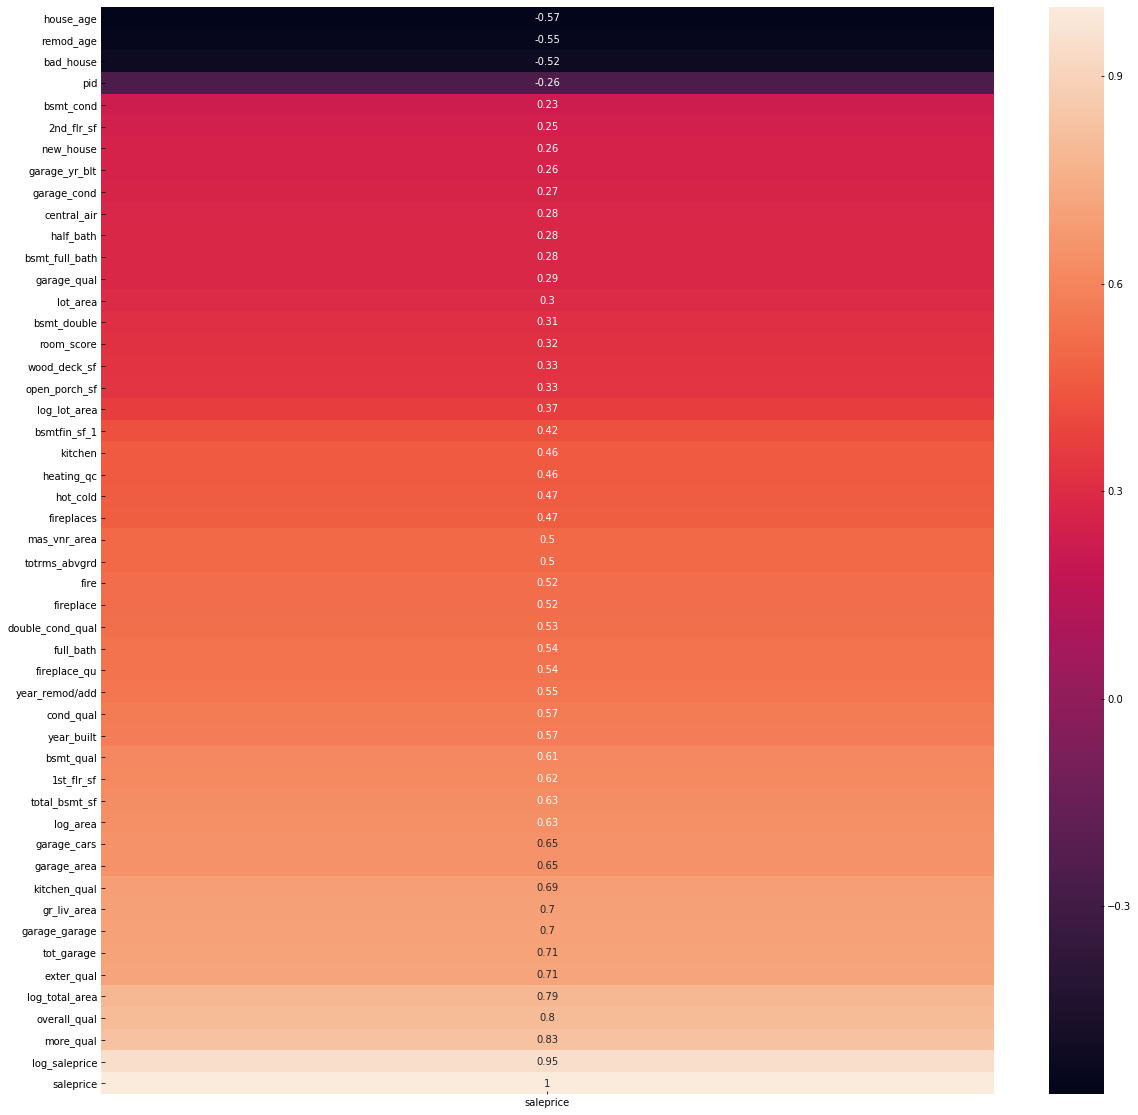

In [83]:
plt.figure(figsize =(20, 20))
sns.heatmap(train[strong_corr_features].corr()[['saleprice']].sort_values('saleprice'), annot=True, );

In [84]:
#strong_corr_features.remove('saleprice')
#strong_corr_features.remove('pid')
#strong_corr_features.remove('log_saleprice')
#strong_corr_features.remove('lot_area')

In [94]:
#First features list based on first complete EDA
features = strong_corr_features + strong_dummy_columns

In [96]:
check_features = []
for i in train.columns:
    if i not in features:
        check_features.append(i)
    

In [101]:
new_features = ['overall_qual', 'year_built', 'year_remod/add', 'mas_vnr_area', 'bsmt_qual', 'bsmt_cond',
                'bsmtfin_sf_1', 'total_bsmt_sf', 'heating_qc', 'central_air', '1st_flr_sf', '2nd_flr_sf',
                'gr_liv_area', 'bsmt_full_bath', 'full_bath', 'half_bath', 'kitchen_qual', 'totrms_abvgrd',
                'fireplace_qu', 'garage_yr_blt', 'garage_cars', 'garage_qual', 'garage_cond', 'wood_deck_sf',
                'open_porch_sf', 'house_age', 'remod_age', 'kitchen', 'room_score', 'tot_garage', 'log_lot_area',
                'log_total_area', 'new_house', 'foundation_PConc', 'foundation_CBlock', 'foundation_BrkTil',
                'exterior_2nd_VinylSd', 'exterior_2nd_CmentBd', 'exterior_2nd_Wd Sdng', 'roof_style_Hip',
                'roof_style_Gable', 'paved_drive_Y', 'paved_drive_N', 'neighborhood_NridgHt', 'neighborhood_NoRidge',
                'neighborhood_StoneBr', 'neighborhood_Somerst', 'neighborhood_Edwards', 'neighborhood_IDOTRR', 
                'neighborhood_NAmes', 'neighborhood_OldTown', 'ms_zoning_RL', 'ms_zoning_RM', 'land_contour_HLS',
                'tot_bath_4', 'tot_bath_3', 'tot_bath_2', 'tot_bath_1', 'sale_type_New', 'sale_type_WD ', 
                'bathtime', 'fire', 'double_cond_qual', 'hot_cold', 'bsmt_double']

# Tracking of Model Performance

This function creates dictionaries for individual models, tracking the features used, their coefficients, and scores on training and test data.

Using the contents of the dictionary, I can remove the features whose coefficients are reduced to try to improve my model.

In [102]:
def feature_coeffict_dictionary(model, feature_list, model_coefficients):
    feature_coef_dict = dict(zip(feature_list, model_coefficients))
    feature_coef_dict['Train Score'] = model.score(X_train_sc, y_train)
    feature_coef_dict['Test Score'] = model.score(X_test_sc, y_test)                          
    return feature_coef_dict

In [152]:
#Here I created a dataframe of my most successful features, along with
#thus far my best features list
best_features = new_features

best_features_df = pd.DataFrame(X.columns, columns=['Feature'])
best_features_df['Lasso_Coef'] = lasso.coef_
best_features_df['Ridge_Coef'] = ridge.coef_
best_features_df['Elastic_Coef'] = elast.coef_
best_features_df['LR_Coef'] = lr.coef_
best_features_df.head()

,Feature,Lasso_Coef,Ridge_Coef,Elastic_Coef,LR_Coef
0,overall_qual,0.064599,0.057342,0.064501,5.645732e-02
1,year_built,0.000000,0.013314,0.001252,1.709416e+11
2,year_remod/add,0.000000,0.007405,0.000000,-1.187434e+11
3,mas_vnr_area,0.002866,0.002854,0.002872,2.686667e-03
4,bsmt_qual,0.008706,0.014290,0.009269,1.361795e-02


In [153]:
best_features_df[['Feature', 'Ridge_Coef']].sort_values('Ridge_Coef')#['Feature']

,Feature,Ridge_Coef
64,bsmt_double,-8.653273e-02
19,garage_yr_blt,-2.981214e-02
63,hot_cold,-2.528159e-02
48,neighborhood_IDOTRR,-2.087931e-02
25,house_age,-2.010261e-02
26,remod_age,-1.720560e-02
50,neighborhood_OldTown,-1.677546e-02
47,neighborhood_Edwards,-1.386992e-02
42,paved_drive_N,-9.795308e-03
27,kitchen,-9.385193e-03


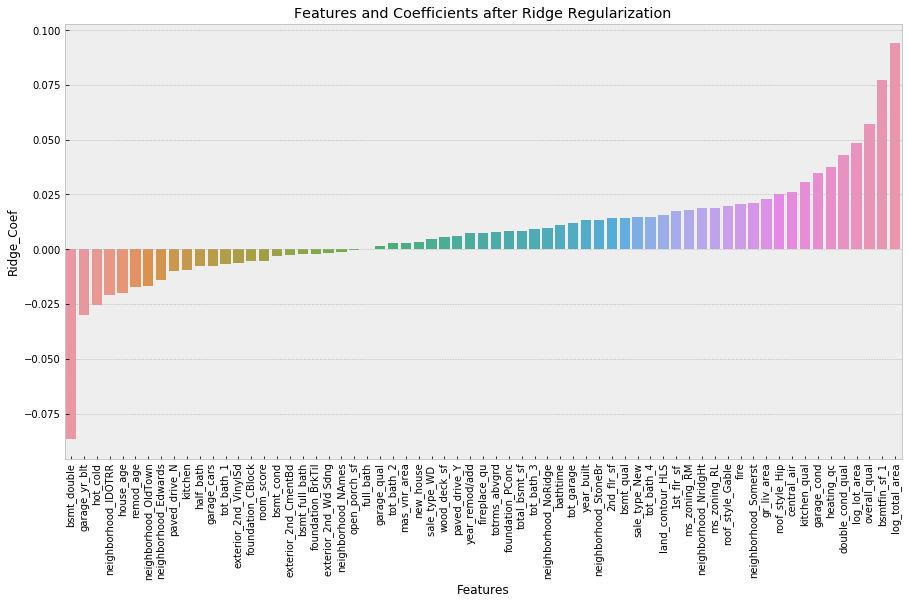

In [154]:
x = best_features_df[['Feature', 'Ridge_Coef']].sort_values('Ridge_Coef')['Feature']
y = best_features_df[['Feature', 'Ridge_Coef']].sort_values('Ridge_Coef')['Ridge_Coef']

plt.figure(figsize = (15,8))

ax = sns.barplot(x, y)
ax.set_title('Features and Coefficients after Ridge Regularization')
ax.set_xlabel('Features')
ax.set_xticklabels(best_features_df[['Feature', 'Ridge_Coef']].sort_values('Ridge_Coef')['Feature'], rotation=90);


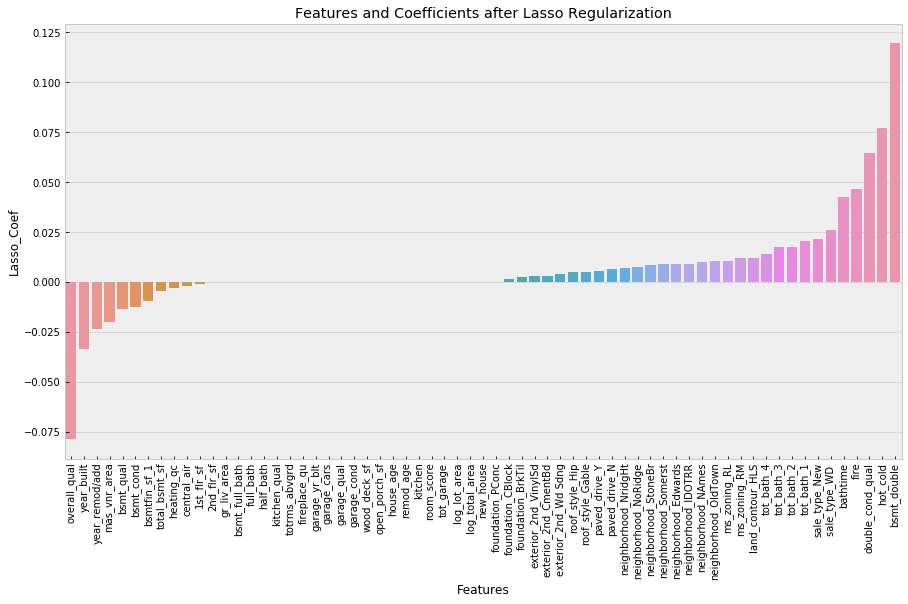

In [155]:
x = best_features_df[['Feature', 'Lasso_Coef']].sort_values('Lasso_Coef')['Feature']
y = best_features_df[['Feature', 'Lasso_Coef']].sort_values('Lasso_Coef')['Lasso_Coef']

plt.figure(figsize = (15,8))

ax = sns.barplot(x, y)
ax.set_title('Features and Coefficients after Lasso Regularization')
ax.set_xlabel('Features')
ax.set_xticklabels(new_features, rotation=90);


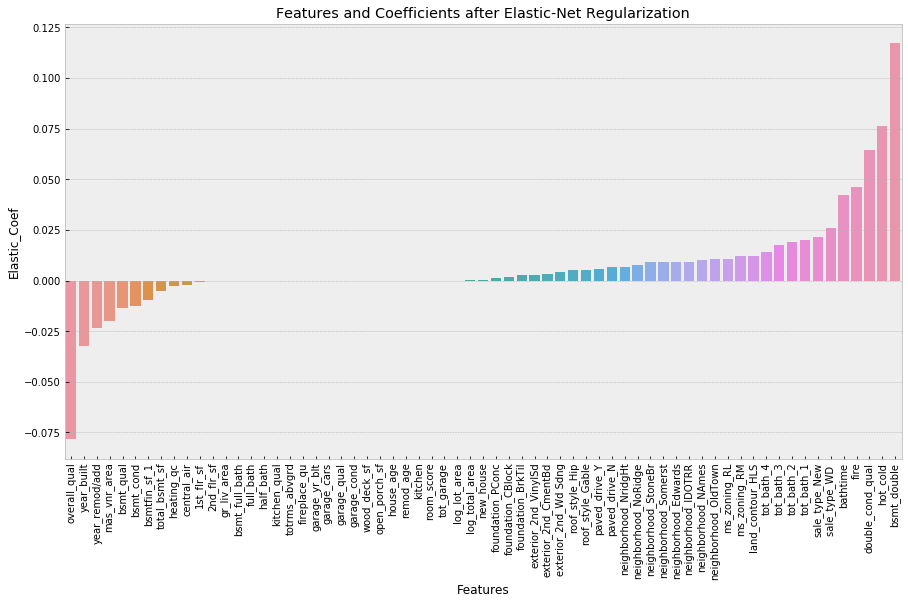

In [156]:
x = best_features_df[['Feature', 'Elastic_Coef']].sort_values('Elastic_Coef')['Feature']
y = best_features_df[['Feature', 'Elastic_Coef']].sort_values('Elastic_Coef')['Elastic_Coef']

plt.figure(figsize = (15,8))

ax = sns.barplot(x, y)
ax.set_title('Features and Coefficients after Elastic-Net Regularization')
ax.set_xlabel('Features')
ax.set_xticklabels(new_features, rotation=90);


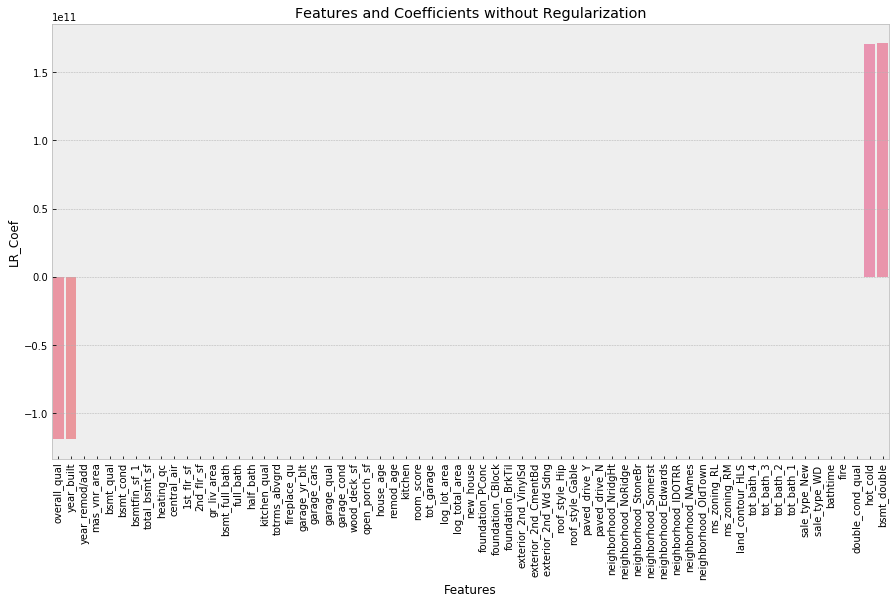

In [157]:
x = best_features_df[['Feature', 'LR_Coef']].sort_values('LR_Coef')['Feature']
y = best_features_df[['Feature', 'LR_Coef']].sort_values('LR_Coef')['LR_Coef']

plt.figure(figsize = (15,8))

ax = sns.barplot(x, y)
ax.set_title('Features and Coefficients without Regularization')
ax.set_xlabel('Features')
ax.set_xticklabels(new_features, rotation=90);


# MODELING

#### Building X and y with appropriate features list

In [103]:
X = train[new_features]
y = train['log_saleprice']

### train test split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [105]:
print(X_train.shape)
print(X_test.shape)

(1640, 65)
(411, 65)


### Scaling the Data

In [106]:
ss = StandardScaler()

In [107]:
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


**Getting a sense of the train and test data**

In [108]:
print(X_train_sc.shape)
print(X_test_sc.shape)

(1640, 65)
(411, 65)


### Ridge Regularization

In [109]:
#Instantiating a ridge movel to test a range of alpha values.
ridge = RidgeCV(alphas=np.arange(0.1, 25, 0.5))

In [110]:
cross_val_score(ridge, X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.90078397, 0.89964057, 0.78092929])

In [111]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  0.6,  1.1,  1.6,  2.1,  2.6,  3.1,  3.6,  4.1,  4.6,  5.1,
        5.6,  6.1,  6.6,  7.1,  7.6,  8.1,  8.6,  9.1,  9.6, 10.1, 10.6,
       11.1, 11.6, 12.1, 12.6, 13.1, 13.6, 14.1, 14.6, 15.1, 15.6, 16.1,
       16.6, 17.1, 17.6, 18.1, 18.6, 19.1, 19.6, 20.1, 20.6, 21.1, 21.6,
       22.1, 22.6, 23.1, 23.6, 24.1, 24.6]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [112]:
ridge.score(X_train_sc, y_train)

0.9128783768268722

In [113]:
#optimized alpha for regularization
ridge.alpha_

21.1

In [114]:
print('R2 Score: ', str(ridge.score(X_train_sc, y_train)))
print("Mean Squared Error", str(mean_squared_error(y_train, ridge.predict(X_train_sc))))
print("Root Mean Squared Error", str(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_sc)))))

np.exp(0.120365569218985)

R2 Score:  0.9128783768268722
Mean Squared Error 0.01448787025341027
Root Mean Squared Error 0.120365569218985


1.127909105071818

In [115]:
#RMSE Test
print('R2 Score: ', str(ridge.score(X_test_sc, y_test)))
print("Mean Squared Error", str(mean_squared_error(y_test, ridge.predict(X_test_sc))))
print("Root Mean Squared Error", str(np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_sc)))))

R2 Score:  0.8826526933875255
Mean Squared Error 0.02114829996411301
Root Mean Squared Error 0.1454245507612556


In [116]:
ridge_new_features = feature_coeffict_dictionary(ridge, new_features, ridge.coef_)

### Lasso Regularization

In [117]:
np.exp(np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_sc))))

1.1565304719465876

In [118]:
#Instantiating a lasso model with LassoCV
lasso = LassoCV()

In [119]:
#Cross validating the score of lasso on multiple folds of the X_train data. 
cross_val_score(lasso, X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

array([0.89948358, 0.90058163, 0.81956257])

In [120]:
#fitting lasso to my training data
lasso.fit(X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [121]:
#verifying the optimal alpha value
lasso.alpha_

0.001799437701073353

In [122]:
#scoring lasso on Train
print('Scores: Train split')
print('R2 Score: ', str(lasso.score(X_train_sc, y_train)))
print("Mean Squared Error", str(mean_squared_error(y_train, lasso.predict(X_train_sc))))
print("Root Mean Squared Error", str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_sc)))))

Scores: Train split
R2 Score:  0.9100666887561432
Mean Squared Error 0.014955439273340431
Root Mean Squared Error 0.12229243342635893


In [123]:
#Scoring Lasso on Test show some overfitting
print('Scores: Test split')
print('R2 Score: ', str(lasso.score(X_test_sc, y_test)))
print("Mean Squared Error", str(mean_squared_error(y_test, lasso.predict(X_test_sc))))
print("Root Mean Squared Error", str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_sc)))))

Scores: Test split
R2 Score:  0.8801860793458585
Mean Squared Error 0.021592832481771337
Root Mean Squared Error 0.14694499815159187


In [124]:
#new features dictionary
lasso_dict_new_features = feature_coeffict_dictionary(lasso, new_features, lasso.coef_)

## Elastic Net Regularization

In [125]:
from sklearn.linear_model import ElasticNetCV

In [126]:
#Instantiate
elast = ElasticNetCV()

In [127]:
#Fit to training data
elast.fit(X_train_sc, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ElasticNetCV(alphas=None, copy_X=True, cv='warn', eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [128]:
elast.alpha_

0.0035988754021467066

In [129]:
#scoring on Training Data
print('Scores: Train split')
print('R2 Score: ', str(elast.score(X_train_sc, y_train)))
print("Mean Squared Error", str(mean_squared_error(y_train, elast.predict(X_train_sc))))
print("Root Mean Squared Error", str(np.sqrt(mean_squared_error(y_train, elast.predict(X_train_sc)))))

Scores: Train split
R2 Score:  0.9100345525721094
Mean Squared Error 0.014960783352660385
Root Mean Squared Error 0.12231428106586895


In [130]:
#Again, somewhat overfit
print('Scores: Test split')
print('R2 Score: ', str(elast.score(X_test_sc, y_test)))
print("Mean Squared Error", str(mean_squared_error(y_test, elast.predict(X_test_sc))))
print("Root Mean Squared Error", str(np.sqrt(mean_squared_error(y_test, elast.predict(X_test_sc)))))

Scores: Test split
R2 Score:  0.88021779248481
Mean Squared Error 0.021587117148418457
Root Mean Squared Error 0.14692554967880317


In [131]:
#Saving to Dictionary
elastic_dict_new_features = feature_coeffict_dictionary(elast, new_features, elast.coef_)

### And the Linear Regression...

In [132]:
#Instantiate
lr = LinearRegression()

In [133]:
#Cross validating
scores = cross_val_score(lr, X_train_sc, y_train, cv=3)
print(scores)
print(scores.mean())

[0.89751632 0.8983003  0.76162414]
0.8524802547793006


In [134]:
lr.fit(X_train_sc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [135]:
print('Scores: Train split')

print('R2 Score: ', str(lr.score(X_train_sc, y_train)))
print("Mean Squared Error", str(mean_squared_error(y_train, lr.predict(X_train_sc))))
print("Root Mean Squared Error", str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_sc)))))

Scores: Train split
R2 Score:  0.913290896167956
Mean Squared Error 0.014419270444626089
Root Mean Squared Error 0.12008026667452937


In [136]:
#again, overfit!
print('Scores: Test split')
print('R2 Score: ', str(lr.score(X_test_sc, y_test)))
print("Mean Squared Error", str(mean_squared_error(y_test, lr.predict(X_test_sc))))
print("Root Mean Squared Error", str(np.sqrt(mean_squared_error(y_test, lr.predict(X_test_sc)))))

Scores: Test split
R2 Score:  0.8831348834641538
Mean Squared Error 0.021061399798488145
Root Mean Squared Error 0.14512546226795678


In [137]:
lr_dict_new_features = feature_coeffict_dictionary(lr, new_features, lr.coef_)
#There are some wild coefficient values here - should check this out more in depth to figure out the best features
#to keep or eliminate.


# Kaggle Submission

In [138]:
#upload the test data
test_data = pd.read_csv('./datasets/test.csv')

In [139]:
#basic eda on the test data - we have to do EVERYTHING we do to the train data on the test data
test_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [140]:
test_data.shape

(879, 80)

In [141]:
test_data.columns = [column.lower().replace(' ', '_') for column in test_data.columns]

In [142]:
#Lot Frontage also has Null data!
test_data.isnull().sum().head()

id                0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage    160
dtype: int64

In [143]:
#Filling the missing values
fill_nan(test_data)

In [144]:
#Changing the nominal values to ordinal
test_data.replace(ordinal_dict.keys(), ordinal_dict.values(), inplace=True)

In [145]:
#Adding our engineered features
test_data = final_feature_generator(test_data)

In [146]:
test_data.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,cond_qual,kitchen,room_score,pool_score,tot_bath,fireplace,tot_garage,has_pool,log_lot_area,log_total_area
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,48,4,36,0,2,0,440,0,9.120634,8.578476
1,2718,905108090,90,RL,0.0,9662,Pave,0,IR1,Lvl,...,20,6,60,0,2,0,3480,0,9.175956,8.776630
2,2414,528218130,60,RL,58.0,17104,Pave,0,IR1,Lvl,...,35,4,21,0,4,4,2556,0,9.747068,8.311890
3,1989,902207150,30,RM,60.0,8520,Pave,0,Reg,Lvl,...,30,3,10,0,1,0,1920,0,9.050172,8.126814
4,625,535105100,20,RL,0.0,9500,Pave,0,IR1,Lvl,...,30,3,18,0,3,8,3084,0,9.159047,8.454466


# Get Dummies on Test Data

In [147]:
test_data = dummy_generator(test_data, dummy_cols)

In [148]:
for i in features:
    if i not in test_data.columns:
        print(i)

saleprice
log_saleprice
new_house
fire
garage_garage
bad_house
log_area
more_qual
double_cond_qual
hot_cold
bsmt_double


In [159]:
test_data['new_house'] = 0

for i in test_data.index:
    if test_data['year_built'][i] == test_data['yr_sold'][i]:
        test_data.loc[[i], ['new_house']] = 1
        
test_data['new_house'].value_counts()

0    843
1     36
Name: new_house, dtype: int64

#### Final Feature Generation

In [160]:
test_data = more_features(test_data)

#### Preparing our X-Test

In [161]:
#creating a copy with just the features we want (not including ID)
X_holdout = test_data[new_features]

In [162]:
X_holdout.head()

,overall_qual,year_built,year_remod/add,mas_vnr_area,bsmt_qual,bsmt_cond,bsmtfin_sf_1,total_bsmt_sf,heating_qc,central_air,...,tot_bath_3,tot_bath_2,tot_bath_1,sale_type_New,sale_type_WD,bathtime,fire,double_cond_qual,hot_cold,bsmt_double
0,6,1910,1950,0.0,2,3,0,1020,4,0,...,0,1,0,0,1,0,0,2304,0,0
1,5,1977,1977,0.0,4,3,0,1967,3,1,...,0,1,0,0,1,0,0,400,3,0
2,7,2006,2006,0.0,4,4,554,654,5,1,...,0,0,0,1,0,2,4,1225,5,306916
3,5,1923,2006,0.0,3,3,0,968,3,1,...,0,0,1,0,1,0,0,900,3,0
4,6,1963,1963,247.0,4,3,609,1394,4,1,...,1,0,0,0,1,1,8,900,4,370881


## Transform the X_test data

In [163]:
X_holdout_sc = ss.transform(X_holdout)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


### Predict values from X_holdout using the desired model

In [2438]:
lasso.predict(X_holdout_sc)

In [2439]:
elast.predict(X_holdout_sc)

In [2440]:
ridge.predict(X_holdout_sc)

### Create a new column in the X_holdout dataframe of Predicted Prices

In [164]:
#LASSO
X_holdout['Pred_Sale_Price'] = np.exp(lasso.predict(X_holdout_sc))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [2595]:
#ELASTIC NET
X_holdout['Pred_Sale_Price'] = np.exp(elast.predict(X_holdout_sc))

In [2510]:
#RIDGE
X_holdout['Pred_Sale_Price'] = np.exp(ridge.predict(X_holdout_sc))

In [2596]:
#LINEAR REGRESSION
X_holdout['Pred_Sale_Price'] = np.exp(lr.predict(X_holdout_sc))

In [165]:
X_holdout.head()

,overall_qual,year_built,year_remod/add,mas_vnr_area,bsmt_qual,bsmt_cond,bsmtfin_sf_1,total_bsmt_sf,heating_qc,central_air,...,tot_bath_2,tot_bath_1,sale_type_New,sale_type_WD,bathtime,fire,double_cond_qual,hot_cold,bsmt_double,Pred_Sale_Price
0,6,1910,1950,0.0,2,3,0,1020,4,0,...,1,0,0,1,0,0,2304,0,0,132013.329103
1,5,1977,1977,0.0,4,3,0,1967,3,1,...,1,0,0,1,0,0,400,3,0,161618.437853
2,7,2006,2006,0.0,4,4,554,654,5,1,...,0,0,1,0,2,4,1225,5,306916,233187.974692
3,5,1923,2006,0.0,3,3,0,968,3,1,...,0,1,0,1,0,0,900,3,0,102428.588013
4,6,1963,1963,247.0,4,3,609,1394,4,1,...,0,0,0,1,1,8,900,4,370881,174632.859062


In [166]:
#Removing all columns but the predicted prices
holdout = X_holdout.drop(new_features, axis=1)

In [167]:
holdout.head()

,Pred_Sale_Price
0,132013.329103
1,161618.437853
2,233187.974692
3,102428.588013
4,174632.859062


In [168]:
#Formatting for Kaggle
holdout.columns = ['SalePrice']

In [169]:
#Adding the ID columns
holdout['Id'] = test_data['id']

In [170]:
holdout.head()

,SalePrice,Id
0,132013.329103,2658
1,161618.437853,2718
2,233187.974692,2414
3,102428.588013,1989
4,174632.859062,625


In [171]:
#Setting ID to Index
holdout.set_index('Id', inplace=True)

In [172]:
holdout.head()

,SalePrice
Id,
2658,132013.329103
2718,161618.437853
2414,233187.974692
1989,102428.588013
625,174632.859062


#### Writing my predictions to CSV for Kaggle Submission

In [173]:
holdout.to_csv('./LR_new_features_submission.csv')